# CSCI 416 - HW1

### Name: Nicholas Wilson

# <font color='red'>Problem 4</font>

In [ ]:
%matplotlib inline

%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output


In [40]:
#Question 4 Part 1
A = np.array([[-2, -3],[1,0]])
B = np.array([[1, 1],[1,0]])
x = ([[-1], [1]])
print("Part 1: ")
print(A)
print(B)
print(x)
#Question 4 Part 2 (inverse)
print("Part 2: ")
C = np.linalg.inv(A)
print(C)
#Question 4 Part 3 (matrix multiplication)
print("Part 3: ")
print(np.matmul(A,C))
print(np.matmul(C,A))
#Question 4 Part 4
print("Part 4: ")
print(np.matmul(A,x))
#Question 4 Part 5 (Transpose)
print("Part 5: ")
print(np.matmul(np.transpose(A), A))
#Question 4 Part 6
print("Part 6: ")
print(np.matmul(A,x) - np.matmul(B,x))
#Question 4 Part 7 (norm, dot product) TODO need to square root
print("Part 7: ")
print(np.sqrt(np.dot(np.transpose(x),x)))
#Question 4 Part 8 (norm) TODO need to square root
#print(np.dot(np.transpose(np.matmul(A,x) - np.matmul(B,x)), np.matmul(A,x) - np.matmul(B,x)))
print("Part 8: ")
print(np.linalg.norm(np.matmul(A,x) - np.matmul(B,x)))
#Question 4 Part 9 (output first column of A)
print("Part 9: ")
print(A[:,0])
#Question 4 Part 10 (assign x to first column of B)
print("Part 10: ")
B[:,0] = np.transpose(x)
print(B)
#Question 4 Part 11
print("Part 11: ")
print(np.multiply(A[:,0], A[:,1]))

Part 1: 
[[-2 -3]
 [ 1  0]]
[[1 1]
 [1 0]]
[[-1], [1]]
Part 2: 
[[-0.          1.        ]
 [-0.33333333 -0.66666667]]
Part 3: 
[[ 1.00000000e+00 -1.11022302e-16]
 [ 0.00000000e+00  1.00000000e+00]]
[[1. 0.]
 [0. 1.]]
Part 4: 
[[-1]
 [-1]]
Part 5: 
[[5 6]
 [6 9]]
Part 6: 
[[-1]
 [ 0]]
Part 7: 
[[1.41421356]]
Part 8: 
1.0
Part 9: 
[-2  1]
Part 10: 
[[-1  1]
 [ 1  0]]
Part 11: 
[6 0]


# <font color='red'>Problem 5</font>

#### *remember to complete part (1) to in hw1.pdf

# Imports
Run this code to import necessary modules. Note that the functions ``cost_function`` and ``gradient`` imported from module ``gd`` are stubs. You will need to fill in the code in ``gd.py``.

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

from gd import cost_function, gradient  # stubs

# Create a simple data set

Run this cell to generate and plot some data from the linear model $y \approx -1 + 2x$, that is, $\theta_0 = -1$ and  $\theta_1 = 2$.

[ 0.48813504  2.15189366  1.02763376  0.44883183 -0.76345201  1.45894113
 -0.62412789  3.91773001  4.63662761 -1.16558481  2.91725038  0.2889492
  0.68044561  4.25596638 -4.28963942 -4.128707   -4.79781603  3.32619846
  2.78156751  3.70012148]


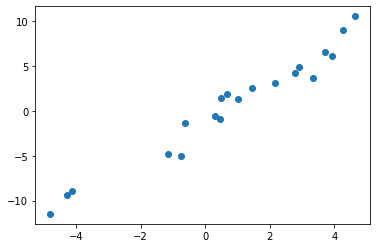

In [2]:
# Set the random seed so the program will always generate the same data
np.random.seed(0)

# Generate n random x values between -5 and 5
n = 20
x = 10 * np.random.rand(n) - 5

#print(x)

# Generate y values from the model y ~= 2x - 1
epsilon = np.random.randn(n)
y = -1 + 2*x + epsilon

plt.plot(x, y, marker='o', linestyle='none')
plt.show()

# TODO: implement the cost function
The squared error cost function is
$$\frac{1}{2} \sum_{i=1}^m \big(h_\theta(x^{(i)}) - y^{(i)}\big)^2.$$
Open the file ``gd.py`` and implement ``cost_function``. Then run this cell to test it out.

In [3]:
print(cost_function(x, y, 0,  1))   # should print 104.772951994
print(cost_function(x, y, 2, -1))   # should print 744.953822077
print(cost_function(x, y, -1, 2))   # should print 14.090816198

104.77295199433607
744.9538220768487
14.090816198013721


# Plotting setup
Run this cell. It sets up a routine ``plot_model`` that will be called later to illustrate the progress of gradient descent.

In [4]:
# Construct a dense grid of (theta_0, theta_1) values
theta0_vals = np.linspace(-10, 10)
theta1_vals = np.linspace(-10, 10)
[THETA0, THETA1] = np.meshgrid(theta0_vals, theta1_vals)

# Define a cost function that has x and y "baked in"
def mycost(theta0, theta1):
    return cost_function(x, y, theta0, theta1)

# Now vectorize this cost function and apply it simultaneously to all
# pairs in dense grid of (theta_0, theta_1) values
mycost_vectorized = np.vectorize(mycost)
J_SURF = mycost_vectorized(THETA0, THETA1)

# Define the test inputs
x_test = np.linspace(-5, 5, 100)

fig = plt.figure(1, figsize=(10,4))

# Create the figure
def init_plot():
    fig.clf();

    # Build left subplot (cost function)
    ax1 = fig.add_subplot(1, 2, 1); 
    ax1.contour(THETA0, THETA1, J_SURF, 20)
    ax1.set_xlabel('Intercept theta_0')
    ax1.set_ylabel('Slope theta_1')
    ax1.set_xlim([-10, 10])
    ax1.set_ylim([-10, 10])

    # The data will be added later for these plot elements:
    line, = ax1.plot([], []);
    dot,  = ax1.plot([], [], marker='o');

    # Build right subplot (data + current hypothesis)
    ax2 = fig.add_subplot(1, 2, 2);
    ax2.plot(x, y, marker='o', linestyle='none') 
    ax2.set_xlim([-6, 6])
    ax2.set_ylim([-10, 10])

    # The data will be added later for this:
    hyp, = ax2.plot( x_test, 0*x_test )
    
    return line, dot, hyp


# Define a function to update the plot
def update_plot(theta_0, theta_1, line, dot, hyp):
    line.set_xdata( np.append(line.get_xdata(), theta_0 ) )
    line.set_ydata( np.append(line.get_ydata(), theta_1 ) )
    dot.set_xdata([theta_0])
    dot.set_ydata([theta_1])
    hyp.set_ydata( theta_0 + theta_1 * x_test )

<Figure size 720x288 with 0 Axes>

# TODO: implement gradient descent

In this cell you will implement gradient descent. Follow these steps:

1. Review the mathematical expressions for $\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)$ and $\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)$ for our model and cost funtion. (**Hint**: they are in the slides!)
1. Implement the function ``gradient`` in ``gd.py`` to return these two partial derivatives.
1. Complete the code below for gradient descent
    * Select a step size
    * Run for a fixed number of iterations (say, 20 or 200)
    * Update theta_0 and theta_1 using the partial derivatives
    * Record the value of the cost function attained in each iteration of gradient descent so you can examine its progress.

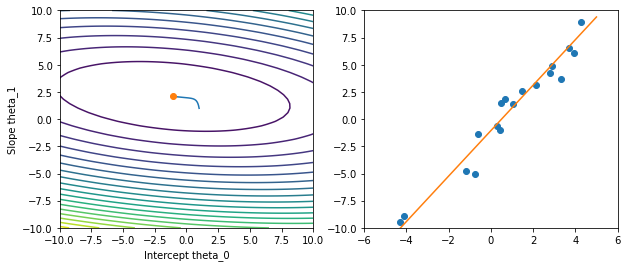

In [14]:
line, dot, hyp = init_plot()

iters = 300  # change as needed

# TODO: intialize theta_0, theta_1, and step size
theta_0 = 1
theta_1 = 1
step_size = 0.001
costs = [None] * iters
for i in range(0, iters):
    
    # Uncomment the code below to display progress of the algorithm so far
    # as it runs. 
    #
    clear_output(wait=True)
    update_plot(theta_0, theta_1, line, dot, hyp)
    display(fig)
    
    # TODO: write code to get partial derivatives (hint: call gradient in gd.py) 
    # and update theta_0 and theta_1
    partial_derivatives = gradient(x,y,theta_0,theta_1)
    theta_0 = theta_0 - step_size * partial_derivatives[0]
    theta_1 = theta_1 - step_size * partial_derivatives[1]
    costs[i] = cost_function(x,y,theta_0,theta_1)
    #pass


# TODO: assess convergence
Plot the cost function vs. iteration. Did the algorithm converge? (Converging means it found the actual setting of $\theta$ that minimizes the cost. If the cost went up or did not go down as far as it could, it did not converge.)

[97.84210090444081, 83.20869096788019, 72.65767104863279, 64.9515259514447, 59.23178435676405, 54.90277718842519, 51.55104902917775, 48.8894870750869, 46.71858626772488, 44.89959460385131, 43.33589474641735, 41.96009571278266, 40.72508326091253, 39.59781477813403, 38.555016895386785, 37.58020223980351, 36.661600736151584, 35.790724963057485, 34.96137510270505, 34.16894866744378, 33.40996153722177, 32.681715509203904, 31.982067435496308, 31.309268803536327, 30.661854166168375, 30.038563450964755, 29.43828776963713, 28.86003153144297, 28.302885871255878, 27.766009932888466, 27.248617608931514, 26.749968073733083, 26.269358955962993, 25.80612135067167, 25.359616115813218, 24.929231068111005, 24.514378810949616, 24.114495008660935, 23.729036978213085, 23.357482508588966, 22.99932884538302, 22.654091797040195, 22.321304932271016, 22.000518847274158, 21.69130048771456, 21.393232514792366, 21.105912707787983, 20.82895339759134, 20.56198092720221, 20.304635136221634, 20.056568867077424, 19.817

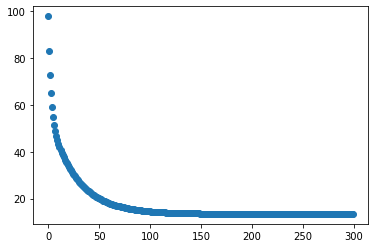

In [16]:
iterations = [i for i in range(iters)]
#print(costs)
plt.plot(iterations, costs, marker='o', linestyle='none')
plt.show()

The algorithm appears to have converged. Reached a small error quickly and remained at that error with further runs.

# TODO: experiment with step size

After you have completed the implementation, do some experiments with different numbers of iterations and step sizes to assess convergence of the algorithm. Report the following:
* A step size for which the algorithm converges to the minimum in at most 200 iterations
* A step size for which the algorithm converges, but it takes more than 200 iterations
* A step size for which the algorithm does not converge, no matter how many iterations are run

** *Write your answer here*. **

Algorithm converges in less than 200 iterations with a step size of 0.01.

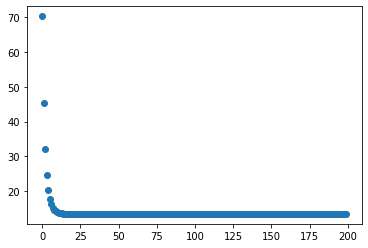

In [17]:
line, dot, hyp = init_plot()

iters = 200  # change as needed

# TODO: intialize theta_0, theta_1, and step size
theta_0 = 1
theta_1 = 1
step_size = 0.01
costs = [None] * iters
for i in range(0, iters):
    
    # Uncomment the code below to display progress of the algorithm so far
    # as it runs. 
    #
    # clear_output(wait=True)
    # update_plot(theta_0, theta_1, line, dot, hyp)
    # display(fig)
    
    # TODO: write code to get partial derivatives (hint: call gradient in gd.py) 
    # and update theta_0 and theta_1
    partial_derivatives = gradient(x,y,theta_0,theta_1)
    theta_0 = theta_0 - step_size * partial_derivatives[0]
    theta_1 = theta_1 - step_size * partial_derivatives[1]
    costs[i] = cost_function(x,y,theta_0,theta_1)
    #pass
iterations = [i for i in range(iters)]
#print(costs)
plt.plot(iterations, costs, marker='o', linestyle='none')
plt.show()


Algorithm converges in more than 200 iterations with a step size of 0.0005.

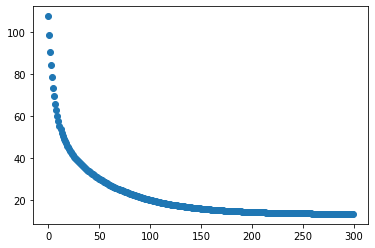

In [20]:
line, dot, hyp = init_plot()

iters = 300  # change as needed

# TODO: intialize theta_0, theta_1, and step size
theta_0 = 1
theta_1 = 1
step_size = 0.0005
costs = [None] * iters
for i in range(0, iters):
    
    # Uncomment the code below to display progress of the algorithm so far
    # as it runs. 
    #
    # clear_output(wait=True)
    # update_plot(theta_0, theta_1, line, dot, hyp)
    # display(fig)
    
    # TODO: write code to get partial derivatives (hint: call gradient in gd.py) 
    # and update theta_0 and theta_1
    partial_derivatives = gradient(x,y,theta_0,theta_1)
    theta_0 = theta_0 - step_size * partial_derivatives[0]
    theta_1 = theta_1 - step_size * partial_derivatives[1]
    costs[i] = cost_function(x,y,theta_0,theta_1)
    #pass
iterations = [i for i in range(iters)]
#print(costs)
plt.plot(iterations, costs, marker='o', linestyle='none')
plt.show()

Algorithm doesn't converge with a step size of 0.05

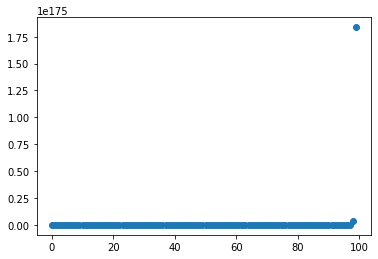

In [32]:
line, dot, hyp = init_plot()

iters = 100  # change as needed

# TODO: intialize theta_0, theta_1, and step size
theta_0 = 1
theta_1 = 1
step_size = 0.05
costs = [None] * iters
for i in range(0, iters):
    
    # Uncomment the code below to display progress of the algorithm so far
    # as it runs. 
    #
    # clear_output(wait=True)
    # update_plot(theta_0, theta_1, line, dot, hyp)
    # display(fig)
    
    # TODO: write code to get partial derivatives (hint: call gradient in gd.py) 
    # and update theta_0 and theta_1
    partial_derivatives = gradient(x,y,theta_0,theta_1)
    theta_0 = theta_0 - step_size * partial_derivatives[0]
    theta_1 = theta_1 - step_size * partial_derivatives[1]
    costs[i] = cost_function(x,y,theta_0,theta_1)
    #pass
iterations = [i for i in range(iters)]
#print(costs)
plt.plot(iterations, costs, marker='o', linestyle='none')
plt.show()

# <font color='red'>Problem 6</font>

# Problem Description

This notebook will guide you through implementation of **multivariate linear regression** to to solve the **polynomial regression** problem:

$$
h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 +  \theta_3 x^3 + \theta_4 x^4
= \boldsymbol{\theta}^T \mathbf{x}
$$

$$
\boldsymbol{\theta} = \begin{bmatrix}\theta_0 \\ \theta_1 \\ \theta_2 \\ \theta_3 \\ \theta_4\end{bmatrix}, 
\qquad
\mathbf{x} = \begin{bmatrix}1 \\ x \\ x^2 \\ x^3 \\ x^4\end{bmatrix}
$$

Below, you will

1. Implement the cost function for multivarate linear regression
1. Implement the normal equations method to solve a multivariate linear regression problem
1. Implement gradient descent for multivariate linear regression
1. Experiment with feature normalization to improve the convergence of gradient descent


## Imports
Run this code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Helper functions
Run this code to set up the helper functions. The function ``feature_expansion`` accepts an vector of $n$ scalar x values and returns an $n \times 5$ data matrix by applying the feature expansion $x \mapsto [1, x, x^2, x^3, x^4]$ to each scalar $x$ value.

In [2]:
def feature_expansion(x, deg):
    if x.ndim > 1:
        raise ValueError('x should be a 1-dimensional array')
    m = x.shape
    x_powers = [x**k for k in range(0,deg+1)]
    X = np.stack( x_powers, axis=1 )

    return X

def plot_model(X_test, theta):
    '''
    Note: uses globals x, y, x_test, which are assigned below
    when the dataset is created. Don't overwrite these variables.
    '''
    y_test = np.dot(X_test, theta)
    plt.scatter(x, y)
    plt.plot(x_test, y_test)
    plt.legend(['Test', 'Train'])

## (2 points) List comprehensions

Read about list comprehensions. Explain what is happening in the line of code

```python
x_powers = [x**k for k in range(0,deg+1)]
```

You are creating a list with degree + 1 elements in which each element is x to the power of (index), so that x_powers[0] = 1, x_powers[1] = x, x_powers[2] = x^2, and so forth up to x_powers[deg] = x^deg (if deg >= 2, since x_powers can only have deg+1 elements).

## Create a data set for polynomial regression

Read and run the code below. This generates data from a fourth-degree polynomial and then uses feature expansion to set up the problem of learning the polynomial as multivariate linear regression

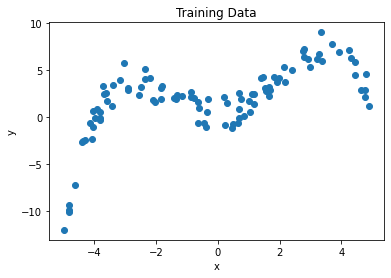

In [3]:
# Set random seed
np.random.seed(0)

# Create random set of m training x values between -5 and 5
m = 100
x = np.random.rand(m)*10 - 5   

# Create evenly spaced test x values (for plotting)
x_test  = np.linspace(-5, 5, 100)
m_test  = len(x_test);

# Feature expansion for training and test x values
deg = 4
X      = feature_expansion(x, deg)
X_test = feature_expansion(x_test, deg)

n = deg + 1   # total number of features including the '1' feature

# Define parameters (theta) and generate y values
theta = 0.1*np.array([1, 1, 10, 0.5, -0.5]);
y = np.dot(X, theta) + np.random.randn(m)   # polynomial plus noise

# Plot the training data
plt.scatter(x, y)
plt.title('Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## (2 points) Implement the cost function
Complete the code below to implement the cost function for multivariate linear regression.

In [4]:
def cost_function(X, y, theta):  
    '''
    Compute the cost function for a particular data set and 
    hypothesis (parameter vector)
    
    Inputs: 
        X       m x n data matrix
        y       training output (length m vector)
        theta   parameters (length n vector)
    Output:
        cost    the value of the cost function (scalar)
    '''
    # TODO: write correct code to compute the cost function
    #cost = 0
    temp = np.matmul(X,theta) - y
    cost = 0.5 * np.dot(np.transpose(temp), temp)
    return cost

## Test the cost function
Run this to test your cost function.

In [5]:
np.random.seed(1)

theta_random = np.random.rand(n)
theta_zeros  = np.zeros(n)
theta_ones   = np.ones(n)

print( "Cost function (random): %.2f" % cost_function(X, y, theta_random))  # prints 54523.64
print( "Cost function  (zeros): %.2f" % cost_function(X, y, theta_zeros))   # prints 845.65
print( "Cost function   (ones): %.2f" % cost_function(X, y, theta_ones))    # prints 2524681.08

Cost function (random): 54523.64
Cost function  (zeros): 845.65
Cost function   (ones): 2524681.08


## (6 points) Implement first training algorithm: normal equations

In [6]:
def normal_equations(X, y):
    '''
    Train a linear regression model using the normal equations

    Inputs: 
        X       m x n data matrix
        y       training output (length m vector)
    Output:
        theta   parameters (length n vector)

    '''
    # TODO: write correct code to find theta using the normal equations
    m, n = X.shape
    theta = np.zeros(n)
    step1 = np.linalg.inv(np.matmul(np.transpose(X), X))
    step2 = np.matmul(step1, np.transpose(X))
    step3 = np.matmul(step2, y)
    return step3

## Use normal equations to fit the model
Run this code to test your implementation of the normal equations. If it runs properly you will see a curve that fits the data well. Note the value of the cost function for ``theta_normal_equations``.

Cost function: 48.54


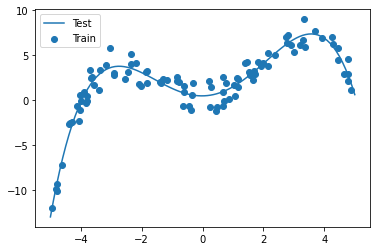

In [7]:
theta_normal_equations = normal_equations(X, y)
#print(len(theta_normal_equations))
#print(len(X_test))
plot_model(X_test, theta_normal_equations)
print ("Cost function: %.2f" % cost_function(X, y, theta_normal_equations))

## (6 points) Implement second training algorithm: (vectorized) gradient descent

Implement gradient descent for multivariate linear regression. Make sure your solution is vectorized.

In [8]:
def gradient_descent( X, y, alpha, iters, theta=None ):
    '''
    Train a linear regression model by gradient descent

    Inputs: 
        X       m x n data matrix
        y       training output (length m vector)
        alpha   step size
        iters   number of iterations
        theta   initial parameter values (length n vector; optional)
    
    Output:
        theta      learned parameters (length n vector)
        J_history  trace of cost function value in each iteration

    '''

    m,n = X.shape
    
    if theta is None:
        theta = np.zeros(n)
        #theta = nprandom.rand(n)
    #print(len(theta))
    # For recording cost function value during gradient descent
    J_history = np.zeros(iters)
    #print(len(theta))
    for i in range(0, iters):
        #print(len(theta))
        # TODO: compute gradient (vectorized) and update theta
        #print("Theta: ")
        #print(theta)
        step1 = np.dot(X, theta) #X * theta
        #print("X * theta")
        #print(step1)
        #print(y)
        step2 = step1 - y # x* theta - y
        #print("X * theta - y")
        #print(step2)
        step3 = np.dot(np.transpose(X),step2) #x transpose * (x * theta - y)
        step4 = alpha * step3 #alpha * x transpose * (x * theta - y)
        #print("Step 3")
        #print(step3)
        theta = theta - step4 

        # Record cost function
        J_history[i] = cost_function(X, y, theta)
        #print(J_history[i])
        #print(len(theta))
    return theta, J_history
#theta_gradient_descent = gradient_descent(X,y,0.01,5,None)

In [ ]:
#A toy model with X and Y (5x5 matrices instead of 100x5)
#Purely for debugging purposes
toyX  = np.linspace(-5, 5, 5)
# Feature expansion for training and test x values
deg = 4
toyX = feature_expansion(toyX, deg)

n = deg + 1   # total number of features including the '1' feature

# Define parameters (theta) and generate y values
toyTheta = 0.1*np.array([1, 1, 10, 0.5, -0.5]);
toyY = np.dot(toyX, toyTheta) + np.random.randn(5)   # polynomial plus noise
print(toyX)
print(toyY)
iter = 100
theta_gradient_descent, costs = gradient_descent(toyX,toyY,0.1,iter,None)


## (4 points) Use gradient descent to train the model
* Write code to call your ``gradient_descent`` method to learn parameter
* Plot the model fit (use ``plot_model``)
* Plot the cost function vs. iteration to help assess convergence
* Print the final value of the cost function
* Experiment with different step sizes and numbers of iterations until you can find a good hypothesis. Try to match the cost function value from ``normal_equations`` to two decimal places. How many iterations does this take?

If I use a step size larger than 0.0000004, theta and cost function explode to infinity for no clear reason. If I use 0.0000004, it takes ~200,000 iterations to match the true minimum to 2 decimal places.

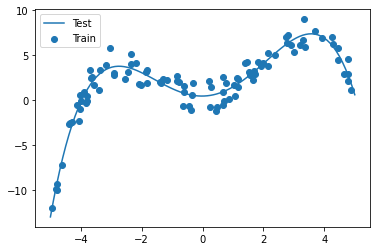

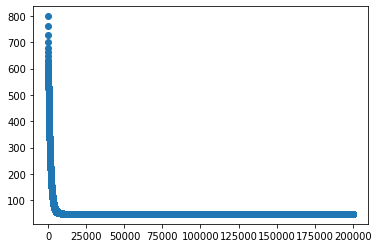

48.54854579982257


In [10]:
# TODO: write code
iter = 200000
theta_gradient_descent, costs = gradient_descent(X,y,0.0000004,iter,None)
#print(len(theta_gradient_descent))
#print(len(X_test))
plot_model(X_test, theta_gradient_descent)
plt.show()
iterations = [i for i in range(iter)]
plt.plot(iterations, costs, marker='o', linestyle='none')
plt.show()
print(costs[-1])

## (10 points) Gradient descent with feature normalization
You should have observed
that it takes many iterations of gradient descent to match the cost
function value achieved by the normal equations. Now
you will implement feature normalization to improve the convergence
of gradient descent. Remember that the formula
for feature normalization is:

$$x^{(i)}_j \leftarrow \frac{x^{(i)}_j - \mu_j}{\sigma_j}$$

Here are some guidelines for the implementation:

* The same transformation should be applied to train and test data.

* The values $\mu_j$ and $\sigma_j$ are the mean and standard deviation of
the $j$th column (i.e., feature) in the **training data**. (Hint:
there are numpy functions to compute these.)

* Do not normalize the column of all ones. (Optional question: why?)

* Use broadcasting to do the normalization--don't write for loops

After normalizing both the training data and test data, follow the same steps as above to experiment with gradient descent using the *normalized* training and test data: print the value of the cost function, and create the same plots. Tune the step size and number of iterations again to make gradient descent converge as quickly as possible. How many iterations does it take to match the cost function value from ``normal_equations`` to two decimal places?  


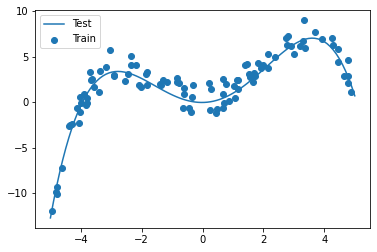

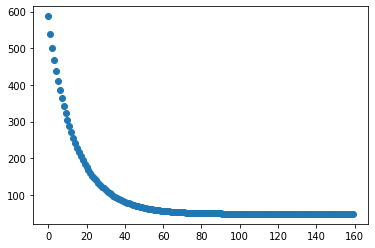

48.54896295296291


In [11]:
# TODO: your code for gradient descent with feature normalization
#Get the mean of each column of X (except column 0)
data_means = X.mean(0)
data_means[0] = 0

test_means = X_test.mean(0)
test_means[0] = 0
#Subtract the mean of each column from each column
normX = X - data_means
normTestX = X_test - test_means
#Get the standard deviation of each column of X (except column 0)
data_stds = np.std(X, axis=0)
data_stds[0] = 1

test_stds = np.std(X_test, axis = 0)
test_stds[0] = 1
#print(data_stds)
#Divide each column by its standard deviation
normX = normX / data_stds
normTestX = normTestX / test_stds
# TODO: write code
iter = 160
theta_gradient_descent, costs = gradient_descent(normX,y,0.0092,iter,None)
#print(len(theta_gradient_descent))
#print(len(X_test))
plot_model(normTestX, theta_gradient_descent)
plt.show()
iterations = [i for i in range(iter)]
plt.plot(iterations, costs, marker='o', linestyle='none')
plt.show()
print(costs[-1])

It only takes ~160 instead of ~200,000 iterations to converge to the correct value within two decimal places, since you can use a larger step size without getting infinite errors.